# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [4]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [5]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [6]:
def svd_validation(A):
    u,s,vh = svd(A)
    m,n = A.shape 
    A_final=np.zeros((m,n))
    for j in range(min(m,n)):
        A_m = np.zeros((max(m,n),1))
        A_m[:,0]=u[:,j]
        A_final+= s[j]*A_m*np.transpose(vh)[:,j]
    return(np.allclose(A,A_final))
        

In [7]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

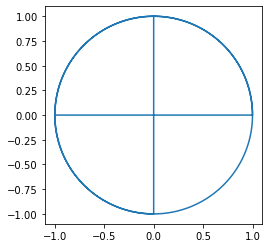

In [231]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [232]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


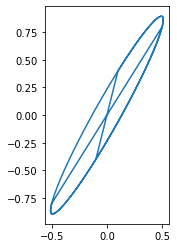

In [253]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [250]:
u, s, vh = svd(A)

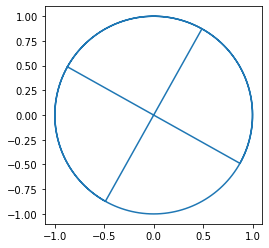

In [254]:
show_circle(u @ circle)

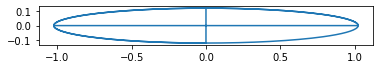

In [255]:
show_circle( np.diagflat(s) @ circle)

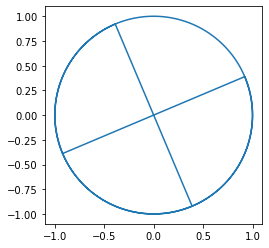

In [256]:
show_circle(vh @ circle)

__Respuesta:__ la transformación de la circunferencia unitaria son rotaciones de la circunferencia unitaria, y si influyen que u, v sean unitarios, pues se puede existir una dilatacion o contraccion.

¿__Respuesta:__ La relacion que existe es que es una descomposicion SVD de las transformaciones que se le realizan a  la circunferencia unitaria. 

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [74]:
from pathlib import Path
from PIL import Image

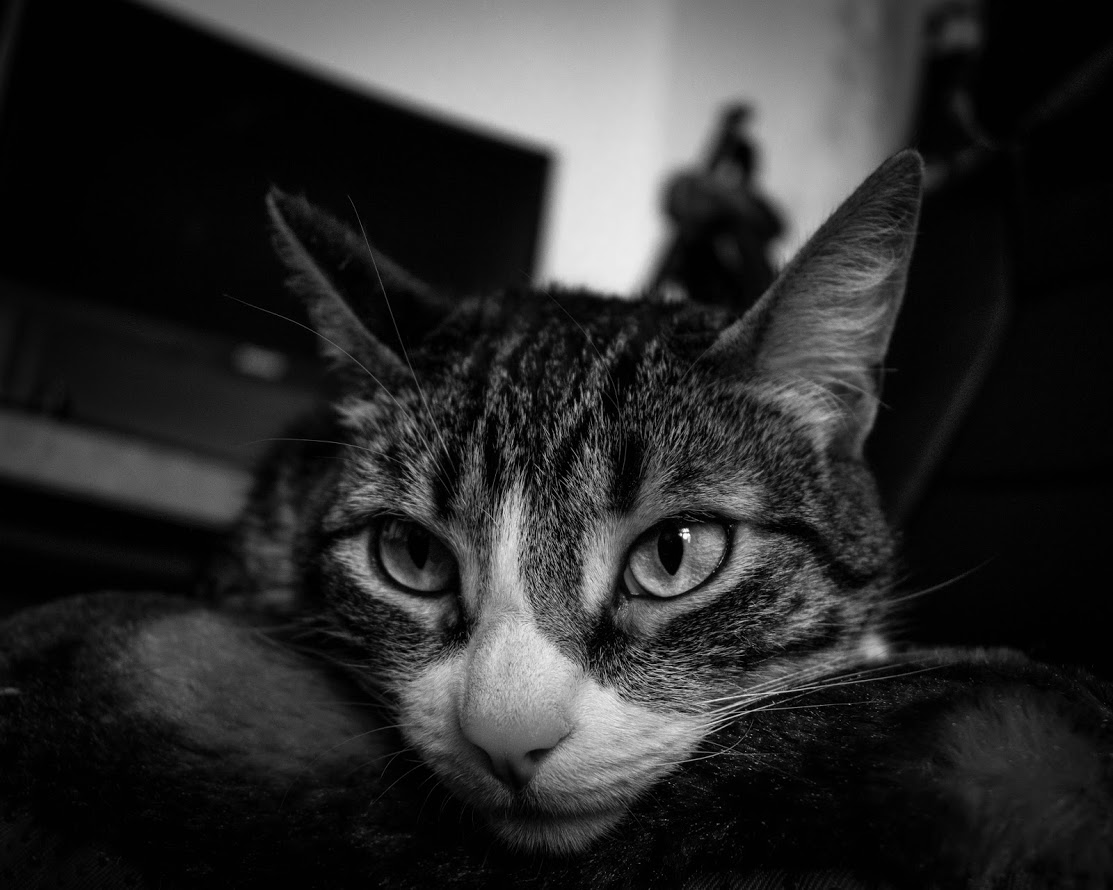

In [75]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [76]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [77]:
def low_rank_svd_approximation(A, l):
    u,s,vh = svd(A)
    m,n=A.shape
    A_l=np.zeros((m,n))
    
    #calculo de la aproximacion de la matriz A_l
    for j in range(l):
        if m>n:
            A_multiplicar = np.zeros((max(m,n),1))
        else:
            A_multiplicar = np.zeros((min(m,n),1))
        A_multiplicar[:,0]=u[:,j]
        A_l+= s[j]*A_multiplicar*np.transpose(vh)[:,j]
    
    #calculo del error de aproximacion utilizando Frobenius
    A_diferencia = A-A_l
    error=0
    for i in range(l):
        for i in range(l):
            valor=abs(A_diferencia)[i,j]**2
            error+=valor
    e_frobenius=np.sqrt(error)
    
    
    #imprimiendo y retornando lo pedido
    print(f"El error de la aproximación utilizando la norma de Frobenius es {e_frobenius}" )
    return(A_l)
    

El error de la aproximación utilizando la norma de Frobenius es 132.8491794443827


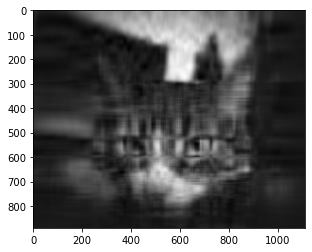

In [78]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error de la aproximación utilizando la norma de Frobenius es 48.04131161988494


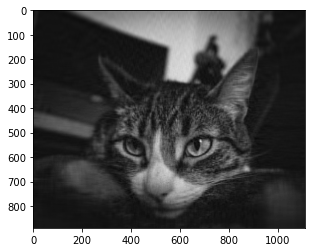

In [79]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [106]:
def low_rank_svd_tol_approximation(A, tol):
    u,s,vh=svd(A)
    fila,columna =A.shape
    r=min (fila, columna)
    
    
    
    for i in range(1,r+1):
        error = (s[i+1:r+1]**2).sum()/(s[0:r+1]**2).sum()
        if error <= tol:
            l = i
            print (f"El mayor rango aproximado de A: {l}   con tolerancia  {tol}" )
            break
    

    
    A_svd = 0
    for i in range(l):
        A_svd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    return A
    

El mayor rango aproximado de A: 4   con tolerancia  0.1


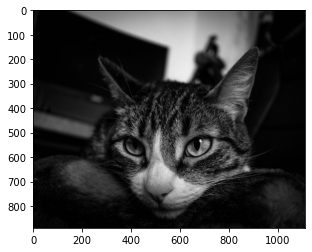

In [107]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El mayor rango aproximado de A: 63   con tolerancia  0.01


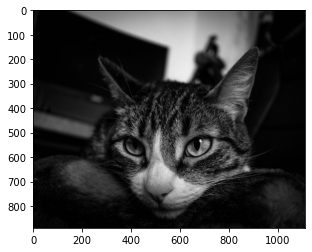

In [108]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

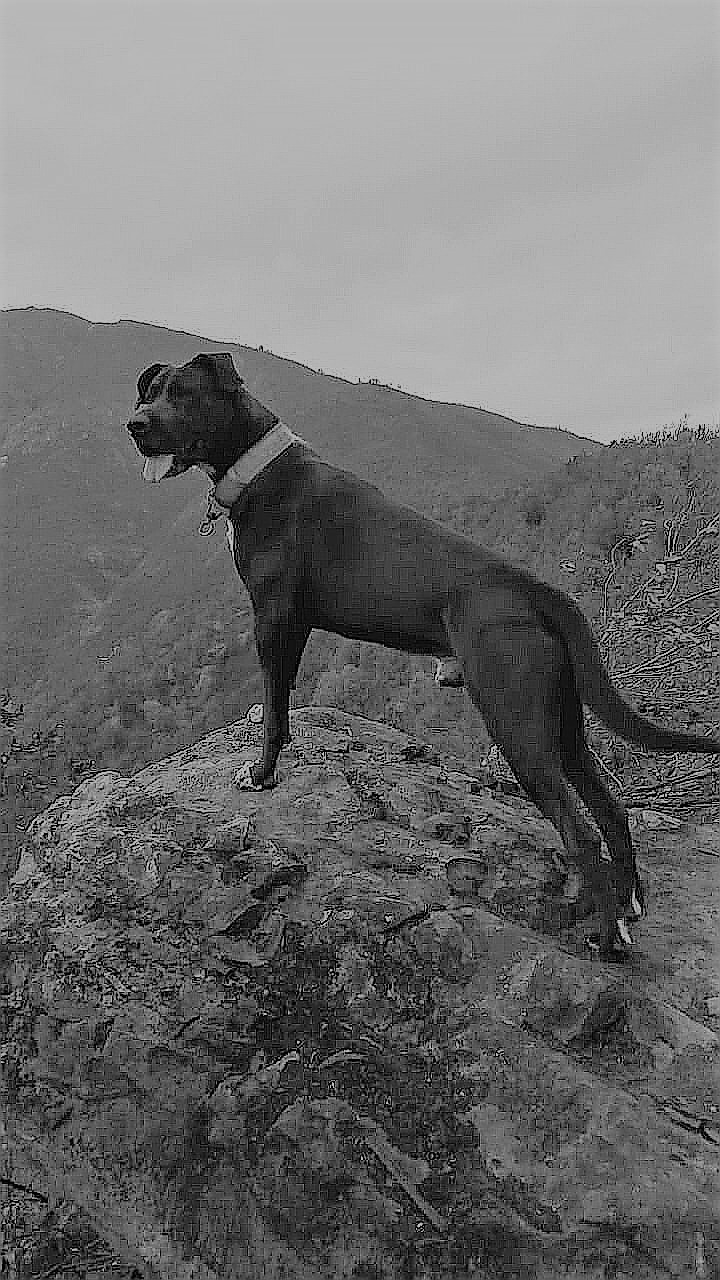

In [100]:
your_img_name = Image.open(Path().resolve().parent / "images" / "venus.jpeg").convert('L')
your_img = Image.open(Path().resolve().parent / "images" / "yaken.jpeg").convert('L')
your_img

In [101]:
your_img_np = np.array(your_img)

El error de la aproximación utilizando la norma de Frobenius es 12.591038128428847


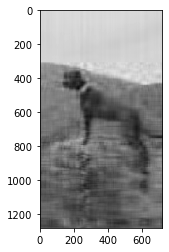

In [112]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error de la aproximación utilizando la norma de Frobenius es 19.200791004464154


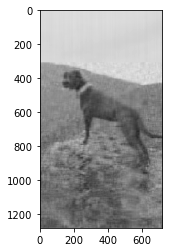

In [110]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El mayor rango aproximado de A: 1   con tolerancia  0.1


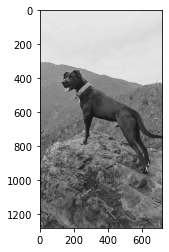

In [111]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El mayor rango aproximado de A: 1   con tolerancia  0.01


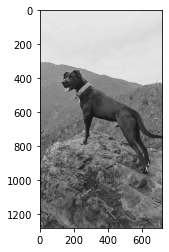

In [105]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ si, seria util, ocuparia menos memoria en el disco duro

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [10]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [117]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [495]:
start_date = '2020-10-01'

end_date = '2020-10-11'

In [544]:
covid_tasa_promedio_nuevos = (
    covid_comunas.loc[lambda x: x['codigo_comuna'].notnull()] #registro con codigo de comuna no nulo
    .apply(lambda x: x.fillna(0) if x.name[0] == '2' else x.values) #Rellena todos los registros de casos totales nulos por cero
    
    .melt(id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa'], var_name='fecha', value_name='casos_totales')#se forman las columnas fecha y casos_totales
    .drop(['codigo_region','codigo_comuna','tasa'], axis=1) #se eliminan columnas no pedidas
    
    .astype({'fecha': "datetime64[ns]"}) #convertir a string las fechas
    .sort_values('fecha') #ordenar  de forma ascendente
    
    .assign(casos_nuevos = lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
           ) #se define casos_nuevos como la diferencia entre dos registros consecutivos para una misma comuna, shift para el primer registro de la comuna sea nulo 
    
    .loc[lambda x: (start_date <= x["fecha"] ) & (x["fecha"] <= end_date)] #filtran por el rango de fecha dado
    
    .assign(promedio_casos_nuevos = lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
           )
    .assign(
        promedio_casos_nuevos= lambda x: x.groupby(["comuna","region"])["casos_nuevos"].transform(lambda s: s.mean())
    ) # se crea columna promedio caso nuevos
    .assign(
        tasa_promedio_casos_nuevos= lambda x: 100000*x['promedio_casos_nuevos']/x['poblacion']
    ) # se crea columna tasa_promedio_casos_nuevos
    .sort_values('tasa_promedio_casos_nuevos', ascending=False) #se ordena tasa_promedio_casos_nuevos de manera descendente.
   
    #se observan filas y columnas duplicas, para eso las eliminaremos con
    .drop_duplicates(subset=['comuna'])
    .drop_duplicates(subset=['fecha','casos_totales','casos_nuevos'])
    
    
)




In [545]:
covid_tasa_promedio_nuevos

,region,comuna,poblacion,fecha,casos_totales,casos_nuevos,promedio_casos_nuevos,tasa_promedio_casos_nuevos
19374,Magallanes,Timaukel,282.0,2020-10-02,2.0,0.0,3.333333,1182.033097
20065,Magallanes,San Gregorio,681.0,2020-10-09,14.0,5.0,4.000000,587.371512
19367,Magallanes,Laguna Blanca,264.0,2020-10-02,6.0,3.0,1.333333,505.050505
20061,Magallanes,Porvenir,7323.0,2020-10-09,369.0,36.0,34.333333,468.842460
20063,Magallanes,Punta Arenas,141984.0,2020-10-09,9431.0,736.0,631.333333,444.651040
...,...,...,...,...,...,...,...,...
19674,Los Lagos,Chaiten,5020.0,2020-10-05,15.0,0.0,0.000000,0.000000
19676,Los Lagos,Cochamo,4006.0,2020-10-05,28.0,0.0,0.000000,0.000000
19677,Los Lagos,Curaco de Velez,4066.0,2020-10-05,18.0,0.0,0.000000,0.000000
19520,O’Higgins,Lolol,7289.0,2020-10-05,74.0,0.0,0.000000,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Son comunas, del extremo sur del pais, con una poblacion muy pequeña

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [114]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [115]:
covid_pcr_melt = (
    covid_pcr.apply(lambda x: x.fillna(0) if x.name[0] == '2' else x.values) #re remplazan valores NA por 0
    .melt(id_vars=['region','codigo_region','poblacion'], var_name='fecha', value_name='nm_pcr')#se forman las columnas fecha y nm_pcr
    .drop(['poblacion','codigo_region'], axis=1) #se eliminan columnas no pedidas
    .astype({'fecha': "datetime64[ns]"})
)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [120]:
covid_casos_melt = (
    covid_comunas.apply(lambda x: x.fillna(0) if x.name[0] == '2' else x.values) #Rellena todos los registros de casos totales nulos por cero
    
    .melt(id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa'], var_name='fecha', value_name='casos_totales')#se forman las columnas fecha y casos_totales
    .drop(['codigo_region','codigo_comuna','comuna','poblacion','tasa'], axis=1) #se eliminan columnas no pedidas
    
    .astype({'fecha': "datetime64[ns]"}) #convertir a string las fechas
    .assign(
        casos_totales= lambda x: x.groupby(["region","fecha"]).transform(lambda s: s.sum())
    ) 
    
    .drop_duplicates(subset=['region','fecha'])
    
    
)

covid_casos_melt

,region,fecha,casos_totales
0,Arica y Parinacota,2020-03-30,6.0
5,Tarapacá,2020-03-30,5.0
13,Antofagasta,2020-03-30,29.0
23,Atacama,2020-03-30,0.0
33,Coquimbo,2020-03-30,21.0
...,...,...,...
23068,Araucanía,2020-10-30,12540.0
23101,Los Ríos,2020-10-30,3594.0
23114,Los Lagos,2020-10-30,15544.0
23145,Aysén,2020-10-30,1105.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [122]:
covid_corr_casos_pcr = (
    covid_casos_melt.merge(covid_pcr_melt, how= "outer" ,on=['region','fecha'])  # uniendo  los registros
     .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)  #se cambia NA por 0
    
    .apply(lambda x: x.ffill() if x.name == "casos_totales" else x.values) #se aplica fill
    
     .groupby("region")[["nm_pcr","casos_totales"]].apply(lambda grp: grp.corr()) #se agrupa por region y se obtiene la correlacion 
    
 
    .loc[(slice(None),"nm_pcr"),"casos_totales"]     #Se elimina la información sobrante
    .reset_index(level=1, drop=True)
    .sort_values()  #Se ordena de manera ascendente
)






covid_corr_casos_pcr

region
Los Ríos              0.052570
Aysén                 0.085471
Atacama               0.136702
Ñuble                 0.142936
Magallanes            0.175921
Araucanía             0.214428
Arica y Parinacota    0.227122
Los Lagos             0.293302
Metropolitana         0.341082
Tarapacá              0.343359
Coquimbo              0.383175
Antofagasta           0.456454
Maule                 0.476686
O’Higgins             0.504412
Valparaíso            0.510306
Biobío                0.559668
Name: casos_totales, dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ si, pues la region de bio bio es la region con la correlacion mas alta, esto quiere decir que si influye la cantidad de pdr con el numero confirmado de covid-19

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.



__Pregunta:__¿Existe una relacioón entre el numero de examenes PCR realicados por region con los casos informados fallecidos por region ?

 Para esto leeremos: `fallecidos_hospitalizados.csv`


In [20]:
coviv_fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto57/fallecidos_hospitalizados.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr1.head()

,fecha,region,hospitalizacion,2020-09-07,2020-09-11,2020-09-14,2020-09-18,2020-09-21,2020-09-25,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30
0,2020-03-19,Antofagasta,FALSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020-03-20,Antofagasta,FALSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2020-03-21,Antofagasta,FALSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2020-03-23,Antofagasta,FALSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020-03-25,Antofagasta,FALSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


 obtén la serie `covid_fallecidos` de la siguiente manera:

* Une `region` ,`Fecha` , `Casos_fallecidos`
* Donde  para`Casos_fallecidos` :
* Rellena los NA de fallecidos  con el valor cero.
* Agrupa por region y hospitalizacion
* convierte la fecha a datetime64[ns]


In [142]:
casos_fallecidos=(
     coviv_fallecidos.drop(['fecha'], axis=1) #se eliminan columnas no pedidas
    .apply(lambda x: x.fillna(0) if x.name[0] == '2' else x.values) #Rellena todos los registros de casos totales nulos por cero
    .melt(id_vars=['region','hospitalizacion'], var_name='fecha', value_name='casos_fallecidos')
    .astype({'fecha': "datetime64[ns]"}) #convertir a string las fechas
    
   
    
)



casos_fallecidos

,region,hospitalizacion,fecha,casos_fallecidos
0,Antofagasta,FALSO,2020-09-07,0.0
1,Antofagasta,FALSO,2020-09-07,0.0
2,Antofagasta,FALSO,2020-09-07,0.0
3,Antofagasta,FALSO,2020-09-07,0.0
4,Antofagasta,FALSO,2020-09-07,0.0
...,...,...,...,...
113147,Ñuble,VERDADERO,2020-10-30,1.0
113148,Metropolitana,VERDADERO,2020-10-30,6.0
113149,Metropolitana,VERDADERO,2020-10-30,9.0
113150,Metropolitana,VERDADERO,2020-10-30,5.0


Para el calculo de la correlacion:

* Usa `covid_pcr_mel`
* Usa merge y agrupa por` región`, `fecha`
* rellena con 0 los valores NA de casos fallecidos
* y obtén la correlación entre `nm_pcr` y `casos_fallecidos`.
* Ordena los valores `ascendentemente`.




In [144]:
covid_corr_casos_pcr = (
    casos_fallecidos.merge(covid_pcr_melt, how= "outer" ,on=['region','fecha'])  # uniendo  los registros
     .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)  #se cambia NA por 0
    
    .apply(lambda x: x.ffill() if x.name == 'casos_fallecidos' else x.values) #se aplica fill
    
     .groupby("region")[["nm_pcr",'casos_fallecidos']].apply(lambda grp: grp.corr()) #se agrupa por region y se obtiene la correlacion 
    
 
    .loc[(slice(None),"nm_pcr"),'casos_fallecidos']     #Se elimina la información sobrante
    .reset_index(level=1, drop=True)
    .sort_values()  #Se ordena de manera ascendente
)






covid_corr_casos_pcr

region
Coquimbo              0.014177
Aysén                 0.024650
Atacama               0.027522
Antofagasta           0.028995
Valparaíso            0.030629
Magallanes            0.031084
Metropolitana         0.033348
Arica y Parinacota    0.033503
Maule                 0.036769
Los Ríos              0.041900
Los Lagos             0.042850
Tarapacá              0.043149
O’Higgins             0.046320
Ñuble                 0.049980
Araucanía             0.062830
Biobío                0.089406
Name: casos_fallecidos, dtype: float64

__Respuesta:__

In [ ]:
Si, tiene relacion, Mienstras mas exmenes de pcr, mas fallecidos se reportar, se puede observar en la region de bio bio. 

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__